# 4. Ley de Zipf

## Perspectivas formales

- Fueron el primer acercamiento al procesamiento del lenguaje natural. Sin embargo tienen varias **desventajas**
- Requieren **conocimiento previo de la lengua**
- Las herramientas son especificas de la lengua
- Los fenomenos que se presentan son muy amplios y dificilmente se pueden abarcar con reglas formales (muchos casos especiales)
- Las reglas tienden a ser rigidas y no admiten incertidumbre en el resultado

## Perspectiva estadística

- Puede integrar aspectos de la perspectiva formal
- Lidia mejor con la insertidumbre y es menos rigida que la perspectiva formal
- No requiere conocimiento profundo de la lengua. Se pueden obtener soluciones de forma no supervisada

### Modelos estadísticos

- Las **frecuencias** juegan un papel fundamental para hacer una descripción acertada del lenguaje
- Las frecuencias nos dan información de la **distribución de tokens**, de la cual podemos estimar probabilidades.
- Existen **leyes empíricas del lenguaje** que nos indican como se comportan las lenguas a niveles estadísticos
- A partir de estas leyes y otras reglas estadisticas podemos crear **modelos del lenguaje**; es decir, asignar probabilidades a las unidades lingüísticas

In [ ]:
# Bibliotecas
from collections import Counter
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 6]
from re import sub
import numpy as np

In [ ]:
mini_corpus = """Humanismo es un concepto polisémico que se aplica tanto al estudio de las letras humanas, los
estudios clásicos y la filología grecorromana como a una genérica doctrina o actitud vital que
concibe de forma integrada los valores humanos. Por otro lado, también se denomina humanis-
mo al «sistema de creencias centrado en el principio de que las necesidades de la sensibilidad
y de la inteligencia humana pueden satisfacerse sin tener que aceptar la existencia de Dios
y la predicación de las religiones», lo que se aproxima al laicismo o a posturas secularistas.
Se aplica como denominación a distintas corrientes filosóficas, aunque de forma particular,
al humanismo renacentista1 (la corriente cultural europea desarrollada de forma paralela al
Renacimiento a partir de sus orígenes en la Italia del siglo XV), caracterizado a la vez por su
vocación filológica clásica y por su antropocentrismo frente al teocentrismo medieval
"""
words = mini_corpus.replace("\n", " ").split(" ")
len(words)

146

In [ ]:
vocabulary = Counter(words)
vocabulary.most_common(10)

[('de', 11),
 ('la', 7),
 ('al', 6),
 ('que', 5),
 ('a', 5),
 ('y', 4),
 ('se', 3),
 ('las', 3),
 ('forma', 3),
 ('aplica', 2)]

In [ ]:
len(vocabulary)

101

In [ ]:
def get_frequencies(vocabulary: Counter, n: int) -> list:
    return [_[1] for _ in vocabulary.most_common(n)]

def plot_frequencies(frequencies: list, title="Freq of words"):
    x = list(range(1, len(frequencies)+1))
    plt.plot(x, frequencies, "-v")
    plt.xlabel("Freq rank (r)")
    plt.ylabel("Freq (f)")
    plt.title(title)

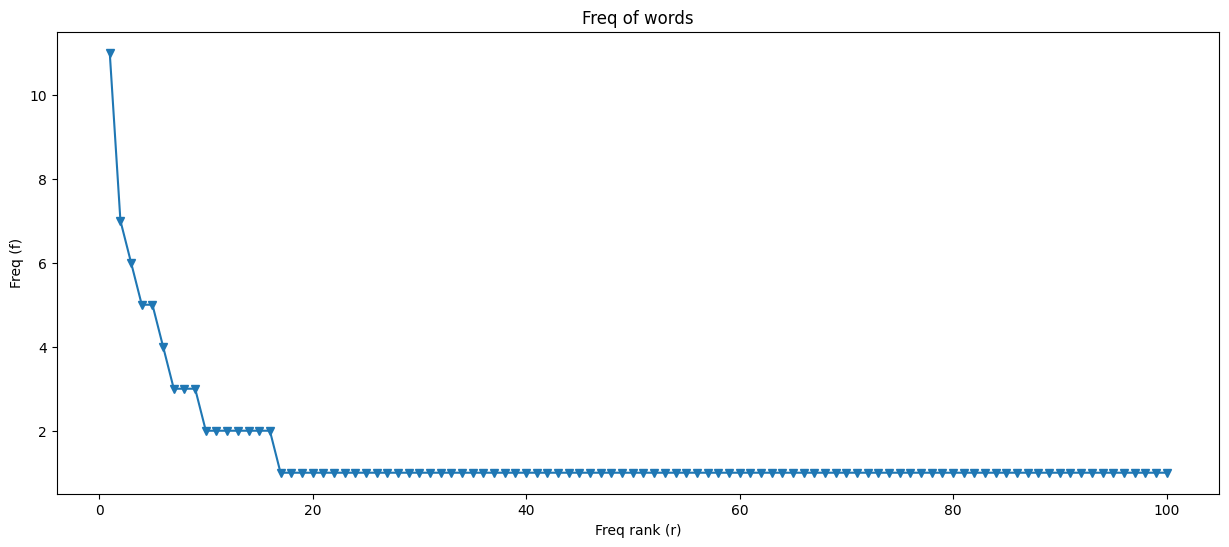

In [ ]:
frequencies = get_frequencies(vocabulary, 100)
plot_frequencies(frequencies)

¿Qué pasará con más datos? ¿Otros idiomas?

### Presentando `pyelotl`

In [ ]:
!pip install elotl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 23.5 MB/s eta 0:00:00a 0:00:01


- [Documentación](https://pypi.org/project/elotl/)
- Paquete para desarrollo de herramientas de NLP enfocado en lenguas de bajos recursos digitales habladas en México

In [ ]:
from elotl import corpus as elotl_corpus


print("Name\t\tDescription")
for row in elotl_corpus.list_of_corpus():
    print(row)

Name		Description
['axolotl', 'Is a nahuatl corpus']
['tsunkua', 'Is an otomí corpus']


Cada corpus se pueden visualizar y navegar a través de interfaz web.
- [Axolotl](https://axolotl-corpus.mx/)
- [Tsunkua](https://tsunkua.elotl.mx/)

In [ ]:
axolotl = elotl_corpus.load("axolotl")
for row in axolotl:
    print("Lang 1 (es) =", row[0])
    print("Lang 2 (nah) =", row[1])
    print("Variante =", row[2])
    print("Documento de origen =", row[3])
    break

Lang 1 (es) = Vino a iluminar el sol y allí fue a ver a su
Lang 2 (nah) = tlaminako tonati uan noponi kiitato
Variante = 
Documento de origen = Lo que relatan de antes (cuentos tének y nahuas de la huasteca)


In [ ]:
tsunkua = elotl_corpus.load("tsunkua")
for row in tsunkua:
    print("Lang 1 (es) =", row[0])
    print("Lang 2 (oto) =", row[1])
    print("Variante =", row[2])
    print("Documento de origen =", row[3])
    break

Lang 1 (es) = Arde, se calcina su corazón y su cuerpo está doliente. De igual modo a mí me arde y se calcina mi corazón.
Lang 2 (oto) = Zo̱, da zot'i ri ndäte ne ri ngo̱k'ei yabu̱ xa ñ'u̱. Mahye̱gi nugi zo̱ ne da zät'i ma ndäte.
Variante = Otomí del Mezquital (ote)
Documento de origen = Visión de los vencidos (hñahñu)


In [ ]:
print("Oraciones paralelas Axolotl:", len(axolotl))
print("Oraciones paralelas Tsunkua:", len(tsunkua))

Oraciones paralelas Axolotl: 16117
Oraciones paralelas Tsunkua: 4963


In [ ]:
def extract_words_from_sentence(sentence: str) -> list:
    return sub(r'[^\w\s\']', ' ', sentence).lower().split()

def preprocess_corpus(corpus):
    # Obtener la oración de L1,
    # quitar signos de puntuación y
    # obtiene la lista de palabras
    word_list_l1 = []
    word_list_l2 = []
    for row in corpus:
        word_list_l1.extend(extract_words_from_sentence(row[0]))
    # Obtener la oración de L1,
    # quitar signos de puntuación y
    # obtiene la lista de palabras
        word_list_l2.extend(extract_words_from_sentence(row[1]))
    return word_list_l1, word_list_l2

In [ ]:
spanish_words_na, nahuatl_words = preprocess_corpus(axolotl)
spanish_words_oto, otomi_words = preprocess_corpus(tsunkua)

In [ ]:
nahuatl_words[0]

'tlaminako'

- **TOKENS**: Número total de palabras dentro del texto (incluidas repeticiones)
- **TIPOS**: Número total de palabras únicas en el texto

### Tokens

In [ ]:
print("Número total de palabras en náhuatl (corpus 1):", len(nahuatl_words))
print("Número total de palabras en español (corpus 1):", len(spanish_words_na))
print("Número total de palabras en otomí (corpus 2):", len(otomi_words))
print("Número total de palabras en español (corpus 2):", len(spanish_words_oto))

Número total de palabras en náhuatl (corpus 1): 286805
Número total de palabras en español (corpus 1): 389138
Número total de palabras en otomí (corpus 2): 68540
Número total de palabras en español (corpus 2): 56866


### ❓ ¿Porqué si son textos paralelos (traducciones) el número de palabras cambia tanto?

De manera general, por las diferencias inherentes de las lenguas para expresar los mismos conceptos, referencias, etc. De manera particular, estas diferencias revelan características morfológicas de las lenguas. El náhuatl es una lengua con tendencia aglutinante/polisintética, por lo tanto, tiene menos palabras pero con morfología rica que les permite codificar cosas que en lenguas como el Español aparecen en la sintaxis. Ejemplo:

> titamaltlakwa - Nosotros comemos tamales

### Tipos

In [ ]:
nahuatl_vocabulary = Counter(nahuatl_words)
nahuatl_es_vocabulary = Counter(spanish_words_na)
otomi_vocabulary = Counter(otomi_words)
otomi_es_vocabulary = Counter(spanish_words_oto)

In [ ]:
nahuatl_vocabulary.most_common(10)

[('yn', 18303),
 ('in', 14550),
 ('auh', 4422),
 ('ye', 3989),
 ('ynic', 3078),
 ('tlen', 3062),
 ('ca', 2568),
 ('de', 2506),
 ('ipan', 2460),
 ('ihuan', 2430)]

In [ ]:
print("Tamaño del vocabulario de nahúatl:", len(nahuatl_vocabulary))
print("Tamaño del vocabulario de español (corpus 1):", len(nahuatl_es_vocabulary))
print("Tamaño del vocabulario de otomí:", len(otomi_vocabulary))
print("Tamaño del vocabulario de español (corpus 2):", len(otomi_es_vocabulary))

Tamaño del vocabulario de nahúatl: 51286
Tamaño del vocabulario de español (corpus 1): 26708
Tamaño del vocabulario de otomí: 7480
Tamaño del vocabulario de español (corpus 2): 8729


### ❓ ¿Cómo cambiarían estas estadísticas si no filtramos los signos de puntuación?

### ❓ ¿Cómo afecta la falta de normalización ortográfica en lenguas como el náhuatl?

Si no normalizamos aumenta el número de tipos lo cual "ensucia" los datos con los que vamos a trabajar. Ejemplo: `algo != algo,`

En lenguas como el nahúatl, la falta de normalización ortográfica y las variaciones diacrónicas del corpus, provocan que haya grafías diferentes que corresponden a una misma palabra. Ejemplo:

- Yhuan-ihuan

- Yn- in


In [ ]:
def avg_len(tokens: list) -> float:
    return sum(len(token) for token in tokens) / len(tokens)

In [ ]:
print("Longitud promedio de palabras en nahúatl:", avg_len(nahuatl_words))
print("Longitud promedio de palabras en otomí:", avg_len(otomi_words))
print("Longitud promedio de palabras en español (corpus 1):", avg_len(spanish_words_na))
print("Longitud promedio de palabras en español (corpus 2):", avg_len(spanish_words_oto))

Longitud promedio de palabras en nahúatl: 6.358700162131065
Longitud promedio de palabras en otomí: 3.5798657718120803
Longitud promedio de palabras en español (corpus 1): 4.619654210074575
Longitud promedio de palabras en español (corpus 2): 4.675043083740724


#### Ejercicio: Obtener la palabra más larga de cada lista de palabras (10 min) (0.5 pt extra 🔥)

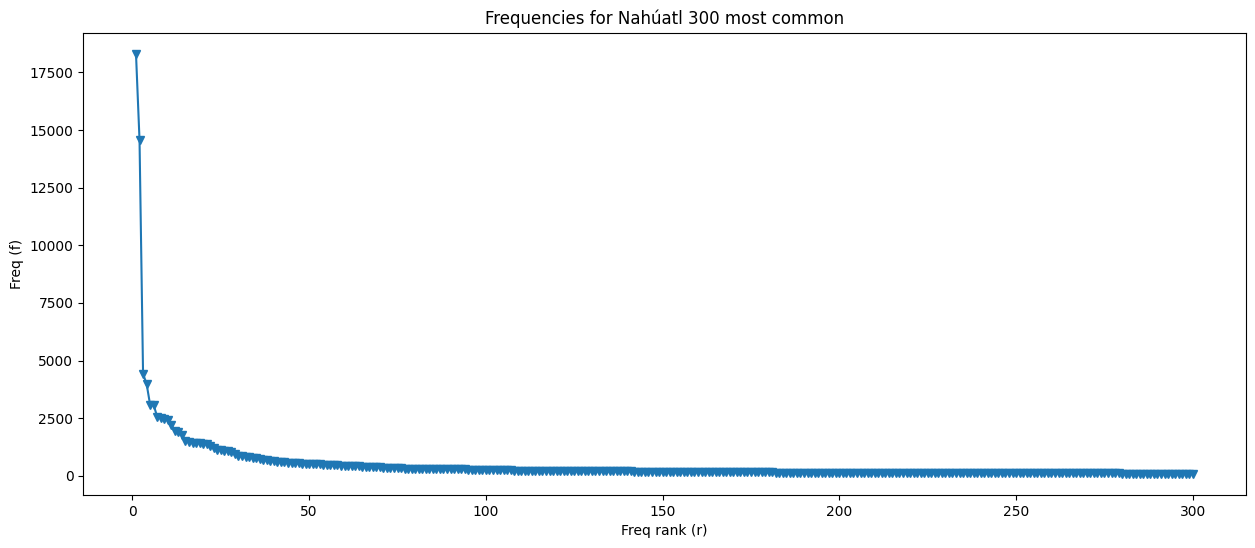

In [ ]:
most_common_count = 300
nahuatl_freqs = get_frequencies(nahuatl_vocabulary, most_common_count)
plot_frequencies(nahuatl_freqs, f"Frequencies for Nahúatl {most_common_count} most common")

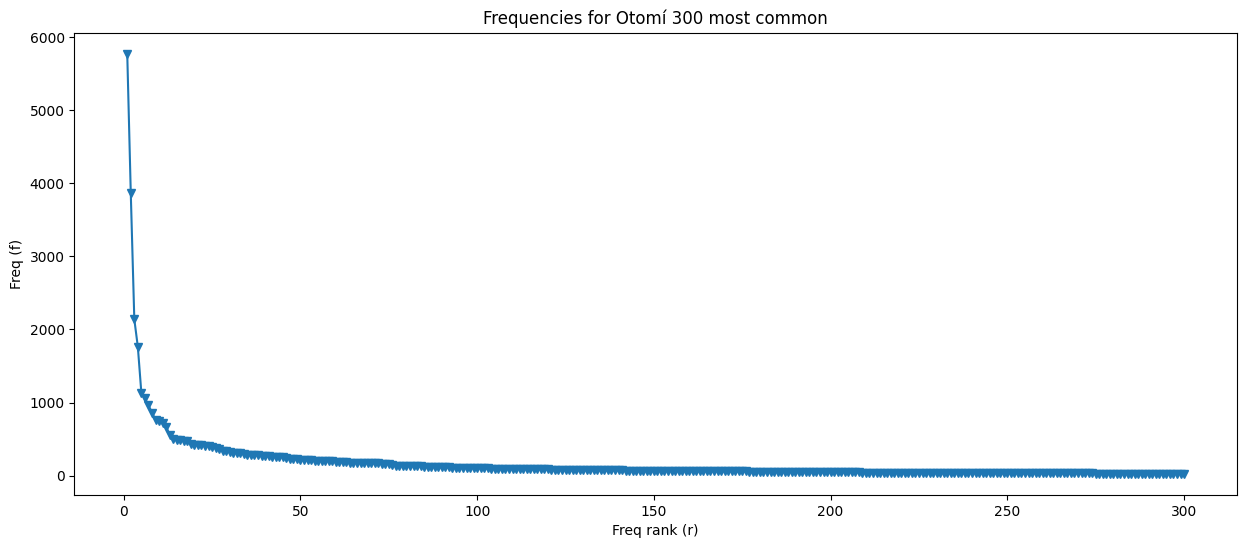

In [ ]:
otomi_freqs = get_frequencies(otomi_vocabulary, most_common_count)
plot_frequencies(otomi_freqs, f"Frequencies for Otomí {most_common_count} most common")

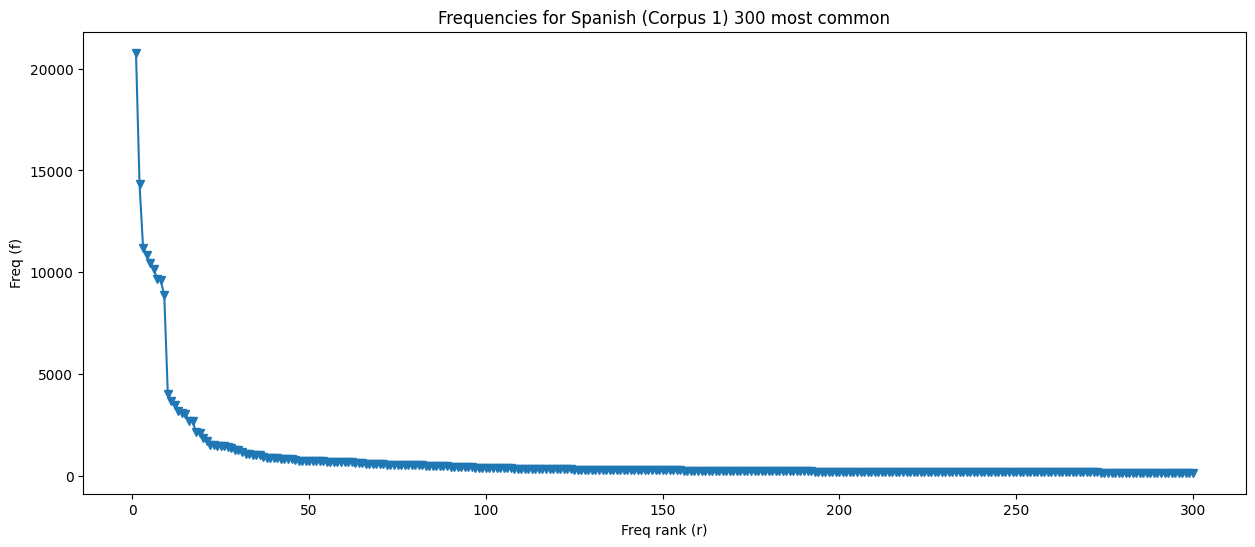

In [ ]:
spanish_freqs = get_frequencies(nahuatl_es_vocabulary, most_common_count)
plot_frequencies(spanish_freqs, f"Frequencies for Spanish (Corpus 1) {most_common_count} most common")

- Notamos que las frecuencias entre lenguas siguen un patrón
- Pocas palabras (tipos) son muy frecuentes, mientras que la mayoría de palabras ocurren pocas veces

De hecho, la frecuencia de la palabra que ocupa la posición r en el rank, es proporcional a 1/r (La palabra más frecuente ocurrirá aproximadamente el doble de veces que la segunda palabra más frecuente en el corpus y tres veces más que la tercer palabra más frecuente del corpus, etc)

$$f(w_r) \propto \frac{1}{r^α}$$

Donde:
- $r$ es el rank que ocupa la palabra en el corpus
- $f(w_r)$ es la frecuencia de la palabra en el corpus
- $\alpha$ es un parámetro, el valor dependerá del corpus o fenómeno que estemos observando

In [ ]:
a = 1.18
N = 100000
zipf_distribution = np.random.zipf(a, N)
zipf_numbers_freqs = get_frequencies(Counter(zipf_distribution), 300)

In [ ]:
zipf_numbers_freqs[:10]

[16297, 7064, 4517, 3231, 2462, 1951, 1651, 1356, 1192, 1031]

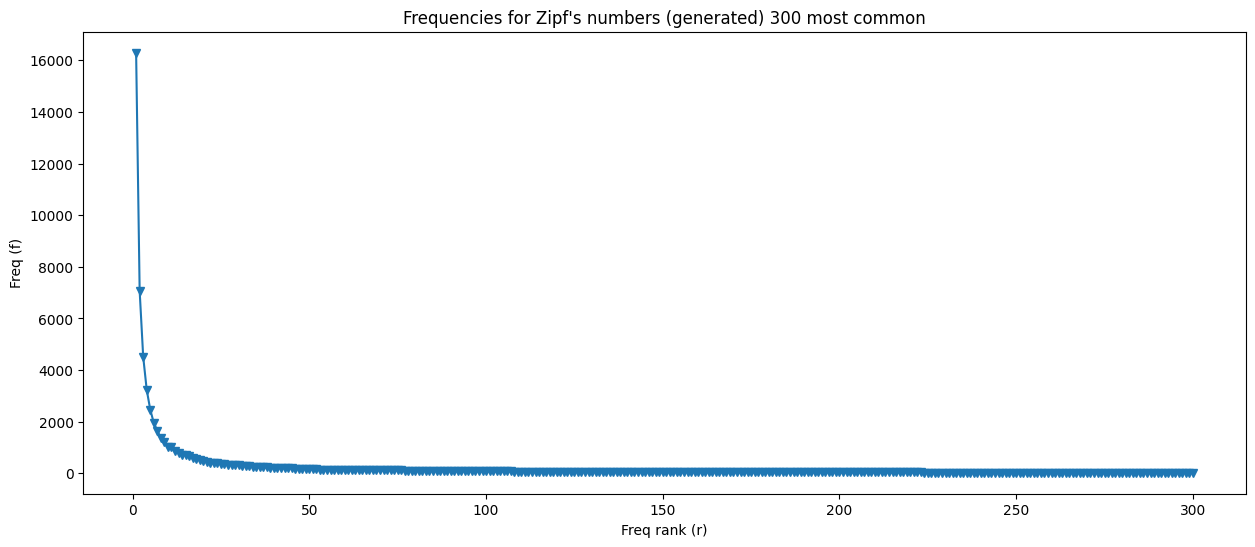

In [ ]:
plot_frequencies(zipf_numbers_freqs, f"Frequencies for Zipf's numbers (generated) 300 most common")

NameError: ignored

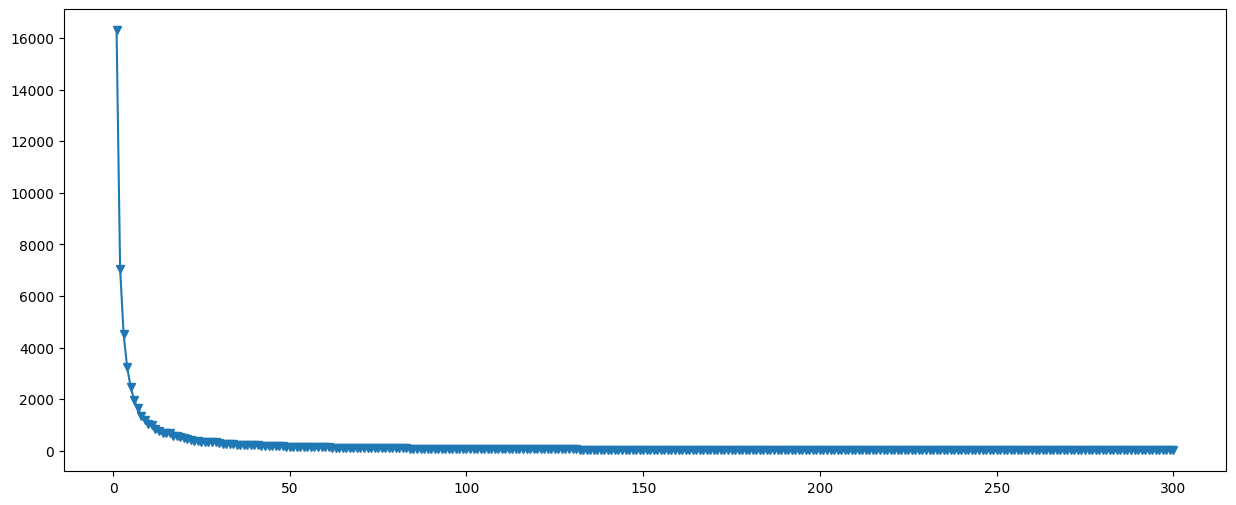

In [ ]:
x = list(range(1, 301))
plt.figure()
plt.plot(x, zipf_numbers_freqs, "-v", label="Zipf generated")
plt.plot(x, nahuatl_freqs, "-v", label="Nahúatl")
plt.plot(x, otomi_freqs, "-v", label="Otomí")
plt.legend()
plt.show()

In [ ]:
def get_words_from_vocabulary(vocabulary: Counter, n: int, most_common=True) -> list:
    pairs = vocabulary.most_common(n) if most_common else vocabulary.most_common()[:-n-1:-1]
    return [pair[0] for pair in pairs]

words_head = get_words_from_vocabulary(otomi_vocabulary, 20)
words_tail = get_words_from_vocabulary(otomi_vocabulary, 20, most_common=False)

In [ ]:
words_tail

['guatemala',
 'pánuco',
 'xalisco',
 'michoacán',
 'matsä',
 'dómíhthó',
 'haxa',
 'yóhontítsi',
 "hinaya'",
 "mihot'i",
 'ndramániñabi',
 'yahmíhí',
 'tsohkí',
 'ndímátú',
 'pepí',
 "nts'ä",
 'ixtlilxóchtil',
 '2002',
 "hmunts'ämpe",
 "'mi"]

In [ ]:
words_head

['ra',
 'ya',
 'bi',
 'mi',
 'ne',
 'da',
 'ha',
 'di',
 'ma',
 "n'a",
 'pa',
 'ge',
 'ko',
 "nu'a",
 'xki',
 'ngu',
 'ri',
 'o',
 'nuya',
 'nuna']

In [ ]:
print ("Longitud promedio de las palabras más frecuentes:", avg_len(words_head))
print ("Longitud promedio de las palabras menos frecuentes:", avg_len(words_tail))

Longitud promedio de las palabras más frecuentes: 2.4
Longitud promedio de las palabras menos frecuentes: 7.2


Probablemente por cuestiones de eficiencia/economía del lenguaje. Representa menor "esfuerzo" ocupar un código pequeño para las palabras que tenemos que usar frecuentemente. Esto también se puede entender en términos de codificación óptima en teoría de la información. [Brevity Law](https://en.wikipedia.org/wiki/Brevity_law)

$$f(w_r) \propto r^{-\alpha}$$

Una de las propiedades interesantes de la Ley de Zipf es que la escala logarítmica 'lineariza' los datos. Esto es claro, pues si obtenemos el logaritmo de ambos lados de la ecuación, tendremos lo siguiente:

$$\log f(w_r) = -\alpha \log r + \beta$$

Recordemos que la proporcionalidad $\propto$ implica que existe una constante que al multiplicar el lado derecho da la igualdad. Es decir, $f(w_r) \propto r^{-\alpha}$ implica que existe una constante $c$ tal que $f(w_r) = c r^{-\alpha}$. En la ecuación logarítmica, entonces, $\beta = \log c$. La pendiente de la recta es negativa.

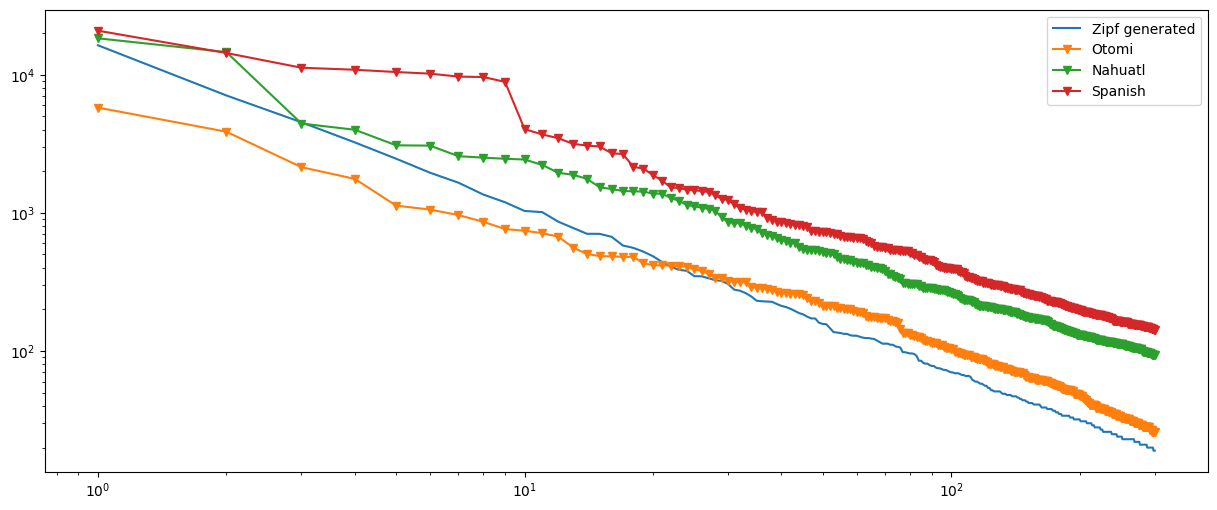

In [ ]:
x = list(range(1, 301))
plt.figure()
plt.loglog(x, zipf_numbers_freqs, label="Zipf generated")
plt.loglog(x, otomi_freqs, "-v", label="Otomi")
plt.loglog(x, nahuatl_freqs, "-v", label="Nahuatl")
plt.loglog(x, spanish_freqs, "-v", label="Spanish")
plt.legend()
plt.show()

- Obtener las frecuencias a otros niveles de las lenguas (español, nahúatl y otomí) y comprobar si se cumple zipf
    - Etiquetas POS (obtenerlas de algun corpus disponible en `nltk`)
        - Español
        - Inglés
    - Caractéres
        - Nahúatl
        - Otomí
        - Español
    - [n-gramas](https://www.ecured.cu/N-grama) de caractéres (`n=2`)
        - Nahúatl
        - Otomí
        - Español
- Comprobar si las *stopwords* que encontramos en paqueterias de *NLP* coinciden con las palabras más comúnes obtenidas en Zipf
    - Realizar una nube de palabras filtrando las stopwords de paqueteria y las obtenidas através de Zipf
    - ¿Obtenemos el mismo resultado? Si o no y ¿Porqué?

#### EXTRA: Zipf para lenguajes artificiales aleatorios

- Encontrar la forma de generar un lenguaje artificial aleatorio y comprobar si cumple Zipf